In [1]:
#!pip install pandas
#!pip install numpy
#!pip install matplotlib
#!pip install sklearn
#!pip install seaborn
#!pip install ipywidgets widgetsnbextension IProgress pandas_profiling
#!!pip install catboost

# при необходимости раскомментить нужное

In [2]:
import sys

if not sys.warnoptions:
    import warnings
    warnings.simplefilter("ignore")

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [4]:
pd.set_option('display.max_columns', 100)

In [5]:
data = pd.read_csv("../../models_v3.csv", na_values=['–','—', '-', 'None'])

# 1. Первичный анализ данных

### Вывод статистик по датасету

In [6]:
data.shape

(81774, 47)

In [7]:
data.head()

,URL,Name,Bio,Subscribers,Videos_views,Pornhub_rank,Model_rank,Public_videos,Paid_videos,Fan_club_material,Verified_pornstar,Verified_member,Premium_user,Pornhub_awards_winner,Age,Background,Birthday,Birthplace,Born,Career Start and End,Career Status,City and Country,Endowment,Ethnicity,Eye Color,Facial Hair,Fake Boobs,Foreskin,Gender,Hair Color,Height,Weight,Interested in,Interests and hobbies,Joined,Measurements,Piercings,Pornstar Profile Views,Profile Views,Relationship status,Star Sign,Tattoos,Turn Offs,Turn Ons,Video Views,Videos Watched,Hometown
0,http://pornhub.com/model/mini-diva,Mini Diva,Hey there! You can call me Mini Diva. I love s...,820K,"364,041,175",11,1.0,65.0,7.0,107.0,0,1,1,0,26.0,NaN,"Aug 6, 1994",Czech Republic,NaN,NaN,NaN,"Heaven, Europe",NaN,White,NaN,NaN,No,NaN,Female,Brunette,"5' 6"" (167cm)",111lbs. (50kg),Guys and Girls,Boring AF.,2 years ago,35-25-36,Yes,NaN,"59,460,751",Single,NaN,No,Dunno what can turn me off.,"When you watching me, fucking love it!","364,041,175","1,057",Prague
1,http://pornhub.com/model/yinyleon,yinyleon,We will try to bring you the best fuck that we...,586K,"510,938,330",21,2.0,140.0,1.0,NaN,0,1,1,0,36.0,NaN,"Jun 1, 1984",NaN,NaN,NaN,NaN,"United states, United States",NaN,NaN,NaN,NaN,NaN,NaN,Couple,NaN,NaN,NaN,Guys and Girls,"I love to go to the gym, running, hiking, fuck...",1 year ago,NaN,NaN,NaN,"67,129,229",Taken,NaN,NaN,NaN,My biggest turn on is when I get my ass and pu...,"510,938,330","1,422",NaN
2,http://pornhub.com/model/crystal-lust,Crystal Lust,Cum see more of me on Onlyfans.com/LustCrystal...,433K,"346,726,146",29,4.0,104.0,69.0,173.0,0,1,1,0,24.0,NaN,"Oct 7, 1996",NaN,NaN,NaN,NaN,"Miami, United States",NaN,NaN,NaN,NaN,NaN,NaN,Female,Brunette,"5' 2"" (157cm)",NaN,Guys and Girls,NaN,1 year ago,42-32-50,NaN,NaN,"50,243,658",Taken,NaN,NaN,NaN,Getting fucked in the ass Onlyfans.com/LustCry...,"346,726,146",560,NaN
3,http://pornhub.com/model/solazola,Solazola,"Hi, guys) We hope that you LOVE SEX as much as...",748K,"234,093,027",32,5.0,50.0,14.0,181.0,0,1,0,0,21.0,NaN,"Dec 12, 1999",NaN,NaN,NaN,NaN,"Tallinn, Estonia",NaN,White,NaN,NaN,No,NaN,Couple,Brunette,"5' 8"" (172cm)",111lbs. (50kg),Guys and Girls,"Sport, snowboarding, movies, fashion, food, pl...",2 years ago,34-24-36,No,NaN,"56,041,576",Taken,NaN,Yes,NaN,blowjobs (love this action),"234,093,027","1,059",NaN
4,http://pornhub.com/model/dickforlily,DickForLily,just a couple who loves to fuck and gets off o...,596K,"357,380,610",43,7.0,175.0,23.0,17.0,0,1,0,0,22.0,NaN,"Oct 5, 1998",NaN,NaN,NaN,NaN,"New York, United States",NaN,White,NaN,NaN,No,NaN,Couple,Brunette,"5' 7"" (170cm)",117lbs. (53kg),Guys and Girls,"I love hiking, sucking dick, fucking and trave...",2 years ago,34-35-25,No,NaN,"44,344,938",Taken,NaN,No,avaricious and hypocritical people,"Men in suits , expensive cars , cute guys","357,380,610","3,391",NaN


In [8]:
data.describe()

,Pornhub_rank,Model_rank,Public_videos,Paid_videos,Fan_club_material,Verified_pornstar,Verified_member,Premium_user,Pornhub_awards_winner,Age,Background,Born,Career Start and End,Career Status,Eye Color,Pornstar Profile Views,Star Sign
count,81774.000000,81610.000000,79561.000000,28760.000000,17517.000000,81774.0,81774.0,81774.000000,81774.000000,80229.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
mean,56429.579463,41934.357946,13.392353,7.841620,23.928355,0.0,1.0,0.032651,0.000024,27.804073,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,26974.421003,24732.503639,36.149875,35.140148,130.965379,0.0,0.0,0.177722,0.004945,26.484533,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,11.000000,1.000000,1.000000,1.000000,1.000000,0.0,1.0,0.000000,0.000000,18.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,34496.250000,20816.250000,3.000000,1.000000,2.000000,0.0,1.0,0.000000,0.000000,22.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,58344.500000,41406.500000,6.000000,2.000000,5.000000,0.0,1.0,0.000000,0.000000,26.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,79600.750000,62285.750000,13.000000,4.000000,15.000000,0.0,1.0,0.000000,0.000000,31.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
max,100240.000000,134458.000000,2910.000000,2268.000000,7570.000000,0.0,1.0,1.000000,1.000000,2020.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 81774 entries, 0 to 81773
Data columns (total 47 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   URL                     81774 non-null  object 
 1   Name                    81774 non-null  object 
 2   Bio                     58845 non-null  object 
 3   Subscribers             81774 non-null  object 
 4   Videos_views            81774 non-null  object 
 5   Pornhub_rank            81774 non-null  int64  
 6   Model_rank              81610 non-null  float64
 7   Public_videos           79561 non-null  float64
 8   Paid_videos             28760 non-null  float64
 9   Fan_club_material       17517 non-null  float64
 10  Verified_pornstar       81774 non-null  int64  
 11  Verified_member         81774 non-null  int64  
 12  Premium_user            81774 non-null  int64  
 13  Pornhub_awards_winner   81774 non-null  int64  
 14  Age                     80229 non-null

### Подготовка датасета (удаление NaN)

In [10]:
def first_value_less(na_stats_sorted, num):
    return [i for i, e in enumerate(list(na_stats_sorted.values)) if e <= num][0]

def find_persentage_of_nan(data):
    na_info = data.isnull()
    sum_na_info = na_info.sum()
    na_stats = sum_na_info / data.shape[0] * 100
    na_stats_sorted = na_stats.sort_values(ascending=False)
    return na_stats_sorted

In [11]:
# находим кол-во nan значений в датасете в процентах
na_stats_sorted = find_persentage_of_nan(data)
na_stats_sorted

Eye Color                 100.000000
Career Status             100.000000
Career Start and End      100.000000
Star Sign                 100.000000
Pornstar Profile Views    100.000000
Born                      100.000000
Background                100.000000
Endowment                  92.031697
Facial Hair                91.450828
Foreskin                   91.361557
Measurements               90.323330
Hometown                   81.842639
Fan_club_material          78.578766
Fake Boobs                 76.016827
Turn Offs                  73.383961
Weight                     71.893267
Birthplace                 67.369824
Piercings                  66.903906
Interests and hobbies      65.940274
Height                     65.606427
Paid_videos                64.829897
Tattoos                    64.773644
Hair Color                 64.712500
Turn Ons                   62.426933
Ethnicity                  60.346809
City and Country           30.947489
Bio                        28.039475
I

Удаляем столбцы, в которых пропущенных значений больше 25%, так как при анализе они нам не понадобятся.

In [12]:
persentage = 25
columns_for_drop = list(na_stats_sorted.index)[:first_value_less(na_stats_sorted, persentage)]
print("Columns for drop:")
print(columns_for_drop)

data_pre = data.drop(columns_for_drop, axis = 1)

Columns for drop:
['Eye Color', 'Career Status', 'Career Start and End', 'Star Sign', 'Pornstar Profile Views', 'Born', 'Background', 'Endowment', 'Facial Hair', 'Foreskin', 'Measurements', 'Hometown', 'Fan_club_material', 'Fake Boobs', 'Turn Offs', 'Weight', 'Birthplace', 'Piercings', 'Interests and hobbies', 'Height', 'Paid_videos', 'Tattoos', 'Hair Color', 'Turn Ons', 'Ethnicity', 'City and Country', 'Bio']


In [13]:
# снова выводим проценты
na_stats_sorted = find_persentage_of_nan(data_pre)
na_stats_sorted

Interested in            6.259936
Public_videos            2.706239
Birthday                 1.913811
Age                      1.889354
Videos Watched           0.769193
Relationship status      0.741067
Video Views              0.272703
Model_rank               0.200553
Gender                   0.003669
Profile Views            0.000000
Joined                   0.000000
URL                      0.000000
Name                     0.000000
Premium_user             0.000000
Verified_member          0.000000
Verified_pornstar        0.000000
Pornhub_rank             0.000000
Videos_views             0.000000
Subscribers              0.000000
Pornhub_awards_winner    0.000000
dtype: float64

Теперь удаляем строчки, в которых есть пропущенные значения.

Так как их суммарно меньше 10%, то мы просто их удаляем, а не заполняем.

In [14]:
persentage = 0
columns_for_dropna = list(na_stats_sorted.index)[:first_value_less(na_stats_sorted, persentage)]
print("Columns for dropna:")
print(columns_for_dropna)

data_pre = data_pre.dropna(subset=columns_for_dropna)

Columns for dropna:
['Interested in', 'Public_videos', 'Birthday', 'Age', 'Videos Watched', 'Relationship status', 'Video Views', 'Model_rank', 'Gender']


In [15]:
# удаляем столбец "URL", так как он не несет за собой смысловой значимости
data_pre = data_pre.drop(["URL"], axis=1)

In [16]:
# делаем последний поиск nan значений
find_persentage_of_nan(data_pre)

Name                     0.0
Age                      0.0
Video Views              0.0
Relationship status      0.0
Profile Views            0.0
Joined                   0.0
Interested in            0.0
Gender                   0.0
Birthday                 0.0
Pornhub_awards_winner    0.0
Subscribers              0.0
Premium_user             0.0
Verified_member          0.0
Verified_pornstar        0.0
Public_videos            0.0
Model_rank               0.0
Pornhub_rank             0.0
Videos_views             0.0
Videos Watched           0.0
dtype: float64

In [17]:
data_pre_copy = data_pre.copy()

### Производим препроцессинг

In [18]:
from sklearn import preprocessing

In [19]:
# для каждого столбца сохраняем энкодеры для будущего использования на графиках
encoders = {}
for c in data_pre.columns:
    encoder = preprocessing.LabelEncoder()
    encoder.fit(data_pre[c])
    data_pre[c] = encoder.transform(data_pre[c])
    encoders[c] = encoder
    

### Рисуем графики

In [20]:
import pandas_profiling

In [21]:
import seaborn as sns

<AxesSubplot:>

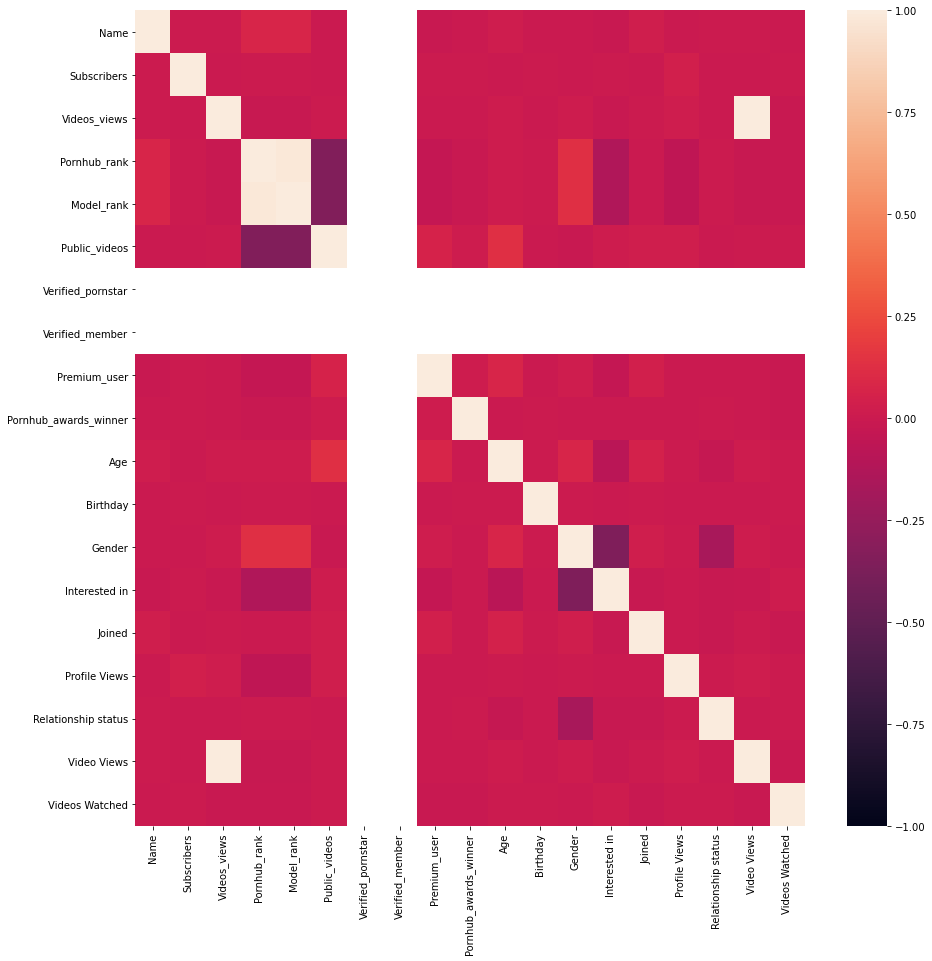

In [22]:
fig, ax = plt.subplots(figsize=(15,15))
sns.heatmap(data_pre.corr(), fmt="f", vmin=-1, vmax=1, ax=ax)

In [23]:
data_pre.corr()

,Name,Subscribers,Videos_views,Pornhub_rank,Model_rank,Public_videos,Verified_pornstar,Verified_member,Premium_user,Pornhub_awards_winner,Age,Birthday,Gender,Interested in,Joined,Profile Views,Relationship status,Video Views,Videos Watched
Name,1.000000,0.000387,0.004373,0.075488,0.073779,-0.004221,NaN,NaN,-0.012272,-0.003627,0.016945,-0.004122,-0.003181,-0.014771,0.027371,-0.007033,0.007687,0.004373,-0.004905
Subscribers,0.000387,1.000000,-0.001540,0.002370,0.003129,-0.006393,NaN,NaN,0.001039,0.000819,-0.002183,0.002300,-0.000910,0.003039,-0.002127,0.032750,-0.002647,-0.001540,0.000855
Videos_views,0.004373,-0.001540,1.000000,-0.016000,-0.016177,0.001795,NaN,NaN,-0.001428,-0.000557,0.009822,-0.000695,0.008960,-0.008392,0.001848,0.020267,-0.004213,1.000000,-0.010864
Pornhub_rank,0.075488,0.002370,-0.016000,1.000000,0.981611,-0.344025,NaN,NaN,-0.035853,-0.009066,0.010829,0.003374,0.129758,-0.130988,-0.002019,-0.058220,0.000113,-0.016000,-0.010112
Model_rank,0.073779,0.003129,-0.016177,0.981611,1.000000,-0.346085,NaN,NaN,-0.036026,-0.009026,0.009198,0.003012,0.128241,-0.128163,-0.003227,-0.059732,0.002649,-0.016177,-0.011300
Public_videos,-0.004221,-0.006393,0.001795,-0.344025,-0.346085,1.000000,NaN,NaN,0.054832,0.011962,0.125553,-0.007104,-0.012580,0.010956,0.028500,0.030359,-0.004410,0.001795,0.003091
Verified_pornstar,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Verified_member,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Premium_user,-0.012272,0.001039,-0.001428,-0.035853,-0.036026,0.054832,NaN,NaN,1.000000,0.013469,0.075071,-0.002286,0.019916,-0.035678,0.032833,-0.004701,-0.000443,-0.001428,-0.010237
Pornhub_awards_winner,-0.003627,0.000819,-0.000557,-0.009066,-0.009026,0.011962,NaN,NaN,0.013469,1.000000,-0.004236,0.007208,-0.003894,-0.001788,-0.002612,-0.001050,0.002612,-0.000557,-0.009070


В данной матрицы имеются строчки полные NaN значений. Это связано с тем, что столбец полностью состоит только из одного значения и соответвенно в формуле мы получаем деление на 0, что в свою очередь дает NaN в результате.

Также удаляем столбец "Video Views" так как у него корреляция со столбцом "Video_views" равна 1.

In [24]:
bad_columns = ["Video Views", "Verified_pornstar", "Verified_member"]

In [25]:
data_pre = data_pre.drop(bad_columns, axis = 1)

# 2 Модели

In [26]:
from sklearn.model_selection import train_test_split

In [27]:
Y = data_pre["Gender"]

In [28]:
X = data_pre.drop(["Gender"], axis=1)

In [29]:
x_train, x_test, y_train, y_test = \
    train_test_split(X, Y, test_size=0.33, random_state=2021)

In [30]:
target_names = encoders['Gender'].inverse_transform(sorted(data_pre['Gender'].unique()))

<AxesSubplot:xlabel='genders', ylabel='amount of entries'>

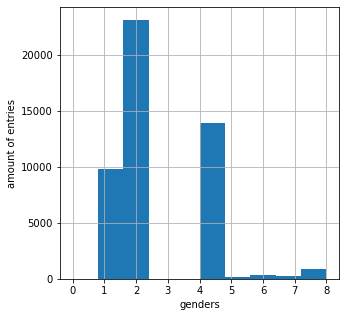

In [31]:
fig, ax = plt.subplots(figsize=(5,5))
ax.set_xlabel("genders")
ax.set_ylabel("amount of entries")
y_train.hist(ax=ax)

<AxesSubplot:xlabel='genders', ylabel='amount of entries'>

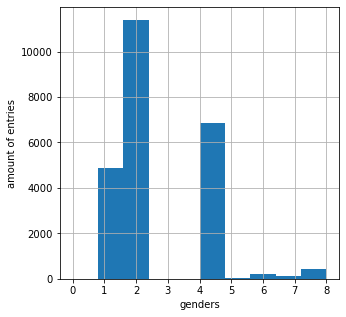

In [32]:
fig, ax = plt.subplots(figsize=(5,5))
ax.set_xlabel("genders")
ax.set_ylabel("amount of entries")
y_test.hist(ax=ax)

Гистограммы разбиений в test и train выборках индентичны. Это показывает, что распределения в обеих выборках соответствуют друг другу.

### KNN

In [33]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report, confusion_matrix
from sklearn.model_selection import GridSearchCV

In [34]:
from sklearn.neighbors import KNeighborsClassifier

In [35]:
knn = KNeighborsClassifier(n_neighbors=100)

In [36]:
knn.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=100)

In [37]:
predicted = knn.predict(x_test)

In [38]:
accuracy_score(y_test, predicted)

0.4880086905657224

In [39]:
target_names = encoders['Gender'].inverse_transform(sorted(data_pre['Gender'].unique()))

In [40]:
print(classification_report(y_test, predicted, target_names=target_names))


              precision    recall  f1-score   support

     Company       0.00      0.00      0.00         1
      Couple       0.42      0.01      0.01      4889
      Female       0.49      0.90      0.64     11393
       Group       0.00      0.00      0.00         1
        Male       0.45      0.21      0.28      6852
  Non-Binary       0.00      0.00      0.00        57
       Other       0.00      0.00      0.00       197
   Trans Man       0.00      0.00      0.00       122
 Trans Woman       0.00      0.00      0.00       422

    accuracy                           0.49     23934
   macro avg       0.15      0.12      0.10     23934
weighted avg       0.45      0.49      0.39     23934



In [41]:
from sklearn.metrics import ConfusionMatrixDisplay

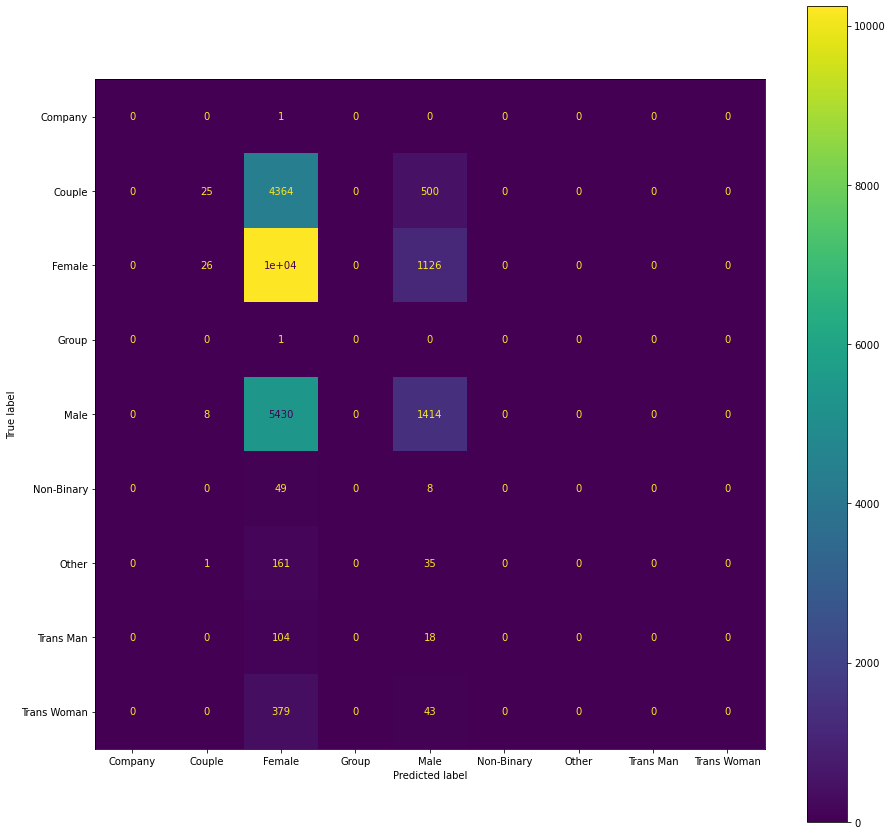

In [42]:
fig, ax = plt.subplots(figsize=(15,15))
cm = ConfusionMatrixDisplay.from_estimator(knn, x_test, y_test, ax=ax, display_labels=target_names)
cm

Матрица ошибок показывает, что из-за неравномерного распределения полов в выборке (женского пола в разы больше остальных), такие гендеры как: 'Group', 'Male', 'Non-Binary', 'Other', 'Trans Man' и 'Trans Woman' были отнесены к гендеру 'Female'. Кроме этого мы видим, что 'Female', 'Male' и 'Couple' в основном относятся к классу 'Female', предполагаю, что это связано с тем, что по побольшей части они снимаются вместе :)

Вывод: Из-за того, что в одном видео может быть не только владелец канала, то на условной "плоcкости" они будут находиться достаточно рядом, из-за этого алгоритм KNN "зацепил" все остальные классы при нахождении гендера 'Female'

In [43]:
def plot_acc(x_ax, y_ax, x_label):
    plt.plot(x_ax, y_ax)
    plt.xlabel(x_label)
    plt.ylabel('mean_test_score')

In [44]:
n_neighbors = np.arange(70, 170, 5)
knn_grid = GridSearchCV(KNeighborsClassifier(), {'n_neighbors': n_neighbors})

In [45]:
knn_grid.fit(x_train, y_train)

GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([ 70,  75,  80,  85,  90,  95, 100, 105, 110, 115, 120, 125, 130,
       135, 140, 145, 150, 155, 160, 165])})

In [46]:
cv_res = knn_grid.cv_results_['mean_test_score']

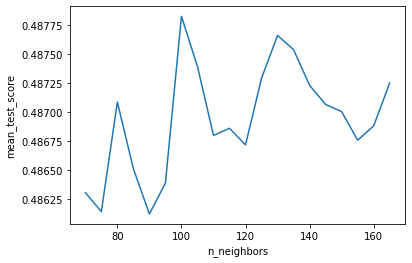

In [47]:
# Выводим график зависимости точности от n_neighbors
plot_acc(n_neighbors, cv_res, 'n_neighbors')

In [48]:
predicted = knn_grid.predict(x_test)

In [49]:
print(classification_report(y_test, predicted, target_names=target_names))

              precision    recall  f1-score   support

     Company       0.00      0.00      0.00         1
      Couple       0.42      0.01      0.01      4889
      Female       0.49      0.90      0.64     11393
       Group       0.00      0.00      0.00         1
        Male       0.45      0.21      0.28      6852
  Non-Binary       0.00      0.00      0.00        57
       Other       0.00      0.00      0.00       197
   Trans Man       0.00      0.00      0.00       122
 Trans Woman       0.00      0.00      0.00       422

    accuracy                           0.49     23934
   macro avg       0.15      0.12      0.10     23934
weighted avg       0.45      0.49      0.39     23934



### RandomForest

In [50]:
from sklearn.ensemble import RandomForestClassifier

In [51]:
forest = RandomForestClassifier(max_depth=40, random_state=0)

In [52]:
forest.fit(x_train, y_train)

RandomForestClassifier(max_depth=40, random_state=0)

In [53]:
predicted = forest.predict(x_test)

In [54]:
print(classification_report(y_test, predicted, target_names=target_names))



              precision    recall  f1-score   support

     Company       0.00      0.00      0.00         1
      Couple       0.54      0.39      0.45      4889
      Female       0.70      0.88      0.78     11393
       Group       0.00      0.00      0.00         1
        Male       0.79      0.71      0.75      6852
  Non-Binary       0.00      0.00      0.00        57
       Other       0.00      0.00      0.00       197
   Trans Man       0.00      0.00      0.00       122
 Trans Woman       0.00      0.00      0.00       422

    accuracy                           0.70     23934
   macro avg       0.23      0.22      0.22     23934
weighted avg       0.67      0.70      0.68     23934



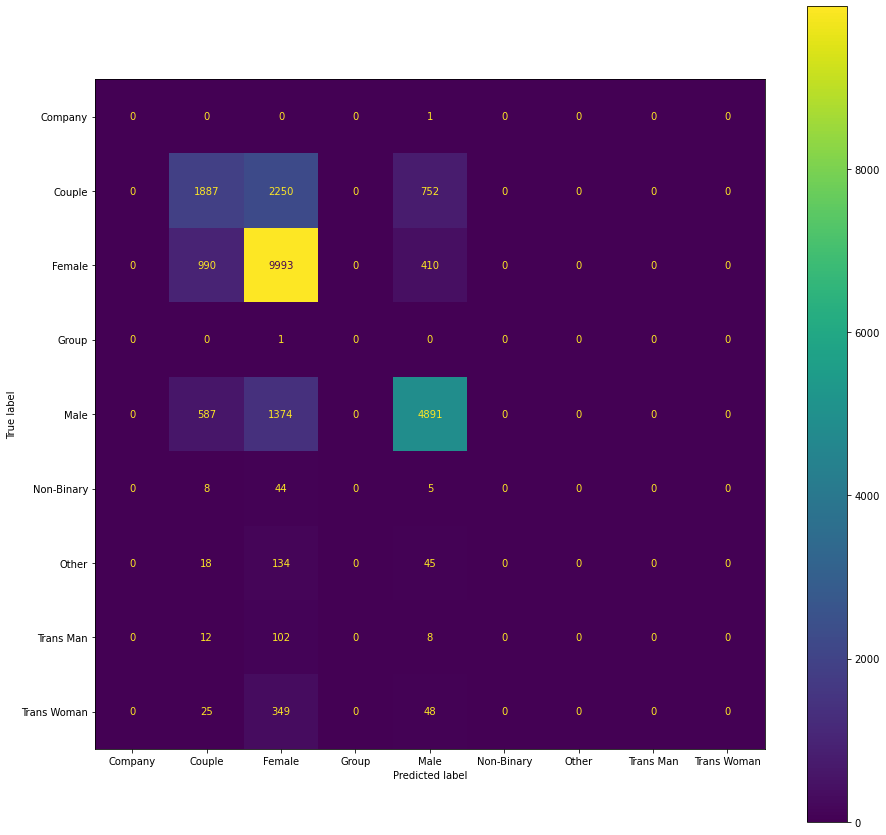

In [55]:
fig, ax = plt.subplots(figsize=(15,15))
cm = ConfusionMatrixDisplay.from_estimator(forest, x_test, y_test, ax=ax, display_labels=target_names)
cm

В отличии от KNN, деревья и рандомный лес справились значительно лучше. Большую часть значений от классов 'Female' и 'Male' он предсказал верно. Это связано с тем, что Деревья решений - это алгоритм, который предсказывает класс отдельно для каждого вектора значений, в то время как KNN определяет окрестности, в которые, как мы уже убедились, могу попадать и другое классы. Нельзя не заметить, что класс 'Couple' он тоже определяет достаточно хорошо, но в то же время элементы данного класса алгоритм относит к 'Female' и 'Male', это связано с тем, в Couple одновременно подразумевается и Female и Male, из-за чего вектор значений, характерный для 'Couple', может быть принят за векторы классов 'Female' или 'Male'

Вывод: на данном датасете деревья решений и рандомный лес работают значительно лучше, чем KNN

In [56]:
max_depth = np.arange(35, 52)
forest_grid = GridSearchCV(RandomForestClassifier(random_state=0), {'max_depth': max_depth})

In [57]:
forest_grid.fit(x_train, y_train)

GridSearchCV(estimator=RandomForestClassifier(random_state=0),
             param_grid={'max_depth': array([35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51])})

In [58]:
predicted = forest_grid.predict(x_test)

In [59]:
forest_grid.cv_results_

{'mean_fit_time': array([7.28112845, 7.23036427, 7.3770206 , 7.21576457, 7.23216066,
        7.27707806, 7.2944171 , 7.24715528, 7.28139019, 7.30749726,
        7.26823359, 7.26452298, 7.30482888, 7.28219776, 7.26060495,
        7.22746153, 7.23486743]),
 'std_fit_time': array([0.04687046, 0.04684575, 0.13231682, 0.02811825, 0.03368387,
        0.04412741, 0.04992796, 0.022896  , 0.04974492, 0.06626435,
        0.03762725, 0.02806102, 0.05791906, 0.02192482, 0.03083099,
        0.03691586, 0.02243021]),
 'mean_score_time': array([0.19142332, 0.18524389, 0.19191699, 0.18327403, 0.18539195,
        0.18791304, 0.19172964, 0.1852654 , 0.18683205, 0.19052529,
        0.18974276, 0.18703036, 0.19118009, 0.18727136, 0.1846333 ,
        0.18475356, 0.1839684 ]),
 'std_score_time': array([0.00424092, 0.00294892, 0.01378242, 0.00060953, 0.00439442,
        0.00421973, 0.0091519 , 0.00189768, 0.00236052, 0.00347035,
        0.00537052, 0.00254229, 0.0080006 , 0.00191227, 0.00168555,
        0.00

In [60]:
cv_res = forest_grid.cv_results_['mean_test_score']

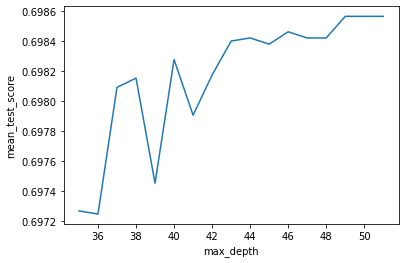

In [61]:
# Выводим график зависимости точности от max_depth
plot_acc(max_depth, cv_res, "max_depth")

In [62]:
print(classification_report(y_test, predicted, target_names=target_names))


              precision    recall  f1-score   support

     Company       0.00      0.00      0.00         1
      Couple       0.53      0.38      0.45      4889
      Female       0.70      0.88      0.78     11393
       Group       0.00      0.00      0.00         1
        Male       0.79      0.71      0.75      6852
  Non-Binary       0.00      0.00      0.00        57
       Other       0.00      0.00      0.00       197
   Trans Man       0.00      0.00      0.00       122
 Trans Woman       0.00      0.00      0.00       422

    accuracy                           0.70     23934
   macro avg       0.23      0.22      0.22     23934
weighted avg       0.67      0.70      0.68     23934



### DecisionTree

In [63]:
from sklearn.tree import DecisionTreeClassifier

In [64]:
tree = DecisionTreeClassifier(max_depth=5, random_state=0)

In [65]:
tree.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=5, random_state=0)

In [66]:
predicted = tree.predict(x_test)

In [67]:
print(classification_report(y_test, predicted, target_names=target_names))



              precision    recall  f1-score   support

     Company       0.00      0.00      0.00         1
      Couple       0.50      0.33      0.40      4889
      Female       0.68      0.88      0.77     11393
       Group       0.00      0.00      0.00         1
        Male       0.81      0.68      0.74      6852
  Non-Binary       0.00      0.00      0.00        57
       Other       0.00      0.00      0.00       197
   Trans Man       0.00      0.00      0.00       122
 Trans Woman       0.00      0.00      0.00       422

    accuracy                           0.68     23934
   macro avg       0.22      0.21      0.21     23934
weighted avg       0.66      0.68      0.66     23934



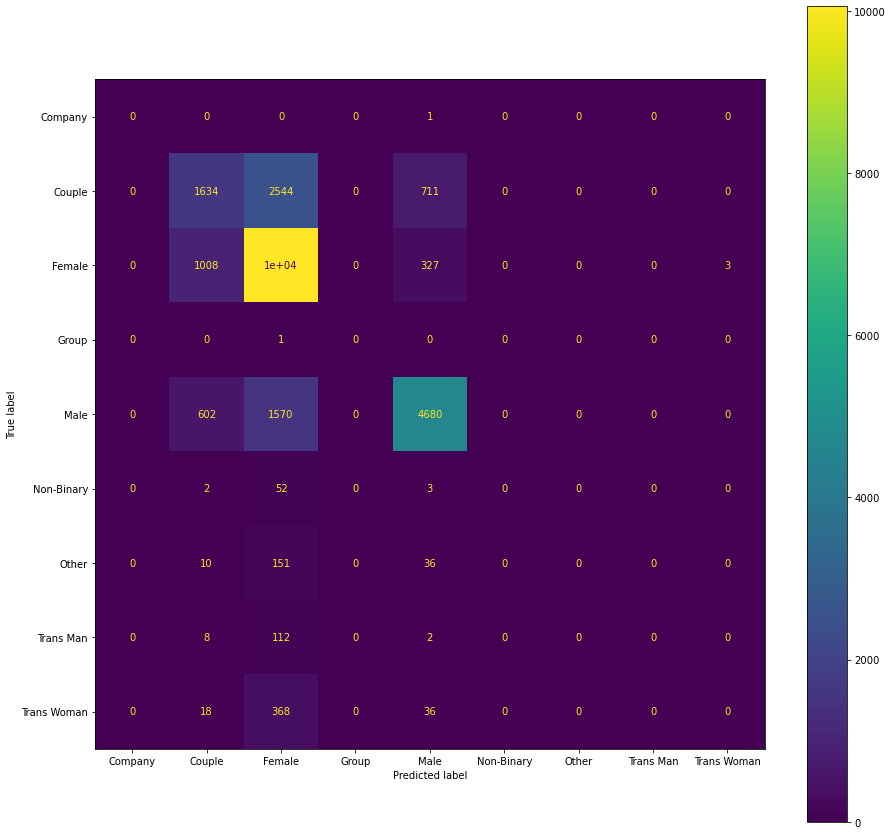

In [68]:
fig, ax = plt.subplots(figsize=(15,15))
cm = ConfusionMatrixDisplay.from_estimator(tree, x_test, y_test, ax=ax, display_labels=target_names)
cm

Вывод соответсвует выводу про деревья решений

In [69]:
max_depth = np.arange(2, 12)
tree_grid = GridSearchCV(DecisionTreeClassifier(random_state=0), {'max_depth':max_depth} )

In [70]:
tree_grid.fit(x_train, y_train)

GridSearchCV(estimator=DecisionTreeClassifier(random_state=0),
             param_grid={'max_depth': array([ 2,  3,  4,  5,  6,  7,  8,  9, 10, 11])})

In [71]:
predicted = tree_grid.predict(x_test)

In [72]:
cv_res = tree_grid.cv_results_['mean_test_score']

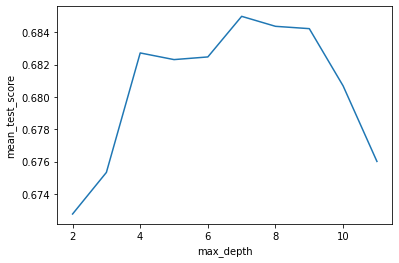

In [73]:
# Выводим график зависимости точности от max_depth
plot_acc(max_depth, cv_res, "max_depth")

In [74]:
print(classification_report(y_test, predicted, target_names=target_names))


              precision    recall  f1-score   support

     Company       0.00      0.00      0.00         1
      Couple       0.49      0.25      0.33      4889
      Female       0.67      0.91      0.77     11393
       Group       0.00      0.00      0.00         1
        Male       0.79      0.69      0.74      6852
  Non-Binary       0.00      0.00      0.00        57
       Other       0.00      0.00      0.00       197
   Trans Man       0.00      0.00      0.00       122
 Trans Woman       0.00      0.00      0.00       422

    accuracy                           0.68     23934
   macro avg       0.22      0.21      0.20     23934
weighted avg       0.65      0.68      0.65     23934



### GaussianNB

In [75]:
from sklearn.naive_bayes import GaussianNB

In [76]:
gauss = GaussianNB(var_smoothing=0.00000000001)

In [77]:
gauss.fit(x_train, y_train)

GaussianNB(var_smoothing=1e-11)

In [78]:
predicted = gauss.predict(x_test)

In [79]:
print(classification_report(y_test, predicted, target_names=target_names))



              precision    recall  f1-score   support

     Company       0.00      0.00      0.00         1
      Couple       0.47      0.11      0.18      4889
      Female       0.65      0.89      0.75     11393
       Group       0.00      0.00      0.00         1
        Male       0.72      0.72      0.72      6852
  Non-Binary       0.00      0.00      0.00        57
       Other       0.01      0.01      0.01       197
   Trans Man       0.00      0.00      0.00       122
 Trans Woman       0.00      0.00      0.00       422

    accuracy                           0.65     23934
   macro avg       0.21      0.19      0.18     23934
weighted avg       0.61      0.65      0.60     23934



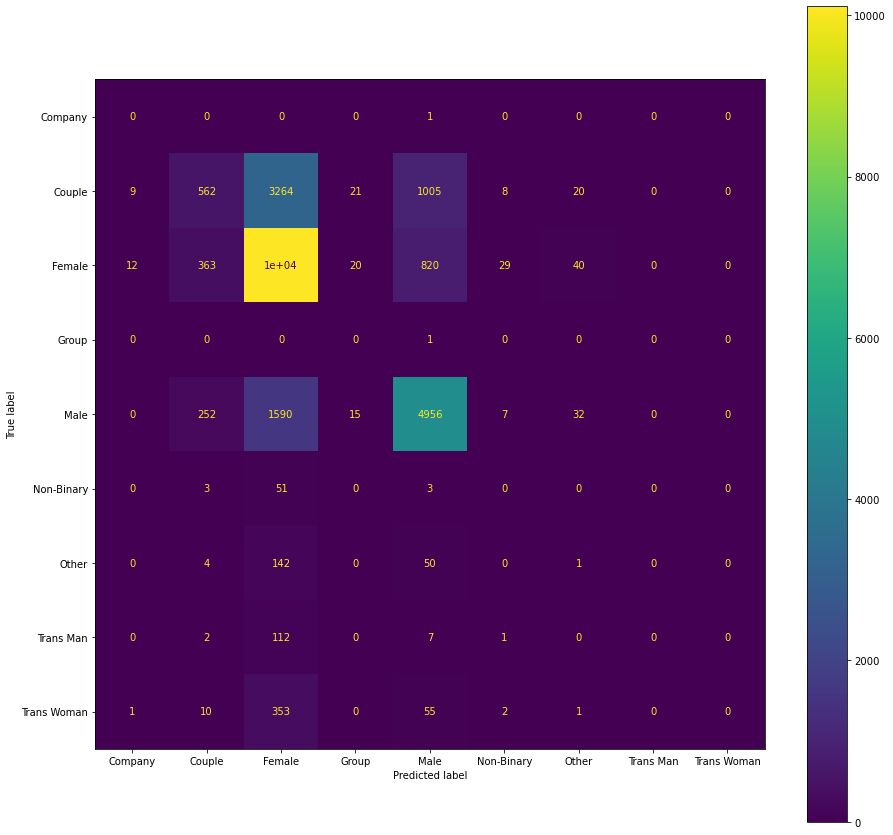

In [80]:
fig, ax = plt.subplots(figsize=(15,15))
cm = ConfusionMatrixDisplay.from_estimator(gauss, x_test, y_test, ax=ax, display_labels=target_names)
cm

Наивный байесовский классификатор основан на применении теоремы Байеса с рассчетом на то, что все данные в датасете независимы между собой (наивное предположение, потому такое название). В этом и кроется основная проблема данного алгоритма на нашем датасете, вектора относящиеся к классу 'Couple' равнозависимые в отношении к классам 'Female' и Male', из-за этого большая часть предположений о классе 'Couple' ушла к двум другим вышеупомянутым классам.

Но несмотря на это, данный алгоритм показал хорошую точность, которая лучше KNN и близка к деревьям решений.

In [81]:
var_smoothing = np.arange(0.00000000001, 0.00000000009, 0.00000000001)
gauss_grid = GridSearchCV(GaussianNB(), {'var_smoothing':var_smoothing})

In [82]:
gauss_grid.fit(x_train, y_train)

GridSearchCV(estimator=GaussianNB(),
             param_grid={'var_smoothing': array([1.e-11, 2.e-11, 3.e-11, 4.e-11, 5.e-11, 6.e-11, 7.e-11, 8.e-11])})

In [83]:
predicted = gauss_grid.predict(x_test)

In [84]:
cv_res = gauss_grid.cv_results_['mean_test_score']

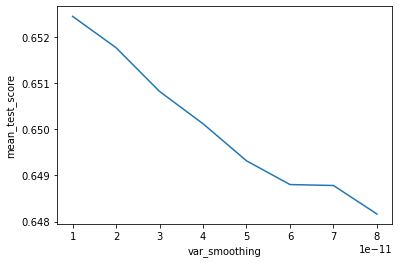

In [85]:
# Выводим график зависимости точности от var_smoothing
plot_acc(var_smoothing, cv_res, "var_smoothing")

In [86]:
print(classification_report(y_test, predicted, target_names=target_names))


              precision    recall  f1-score   support

     Company       0.00      0.00      0.00         1
      Couple       0.47      0.11      0.18      4889
      Female       0.65      0.89      0.75     11393
       Group       0.00      0.00      0.00         1
        Male       0.72      0.72      0.72      6852
  Non-Binary       0.00      0.00      0.00        57
       Other       0.01      0.01      0.01       197
   Trans Man       0.00      0.00      0.00       122
 Trans Woman       0.00      0.00      0.00       422

    accuracy                           0.65     23934
   macro avg       0.21      0.19      0.18     23934
weighted avg       0.61      0.65      0.60     23934



### LogisticRegression

In [87]:
from sklearn.linear_model import LogisticRegression

In [88]:
logreg = LogisticRegression()

In [89]:
logreg.fit(x_train, y_train)

LogisticRegression()

In [90]:
predicted = logreg.predict(x_test)

In [91]:
print(classification_report(y_test, predicted, target_names=target_names))



              precision    recall  f1-score   support

     Company       0.00      0.00      0.00         1
      Couple       0.00      0.00      0.00      4889
      Female       0.48      0.92      0.63     11393
       Group       0.00      0.00      0.00         1
        Male       0.38      0.12      0.18      6852
  Non-Binary       0.00      0.00      0.00        57
       Other       0.00      0.00      0.00       197
   Trans Man       0.00      0.00      0.00       122
 Trans Woman       0.00      0.00      0.00       422

    accuracy                           0.47     23934
   macro avg       0.10      0.11      0.09     23934
weighted avg       0.34      0.47      0.35     23934



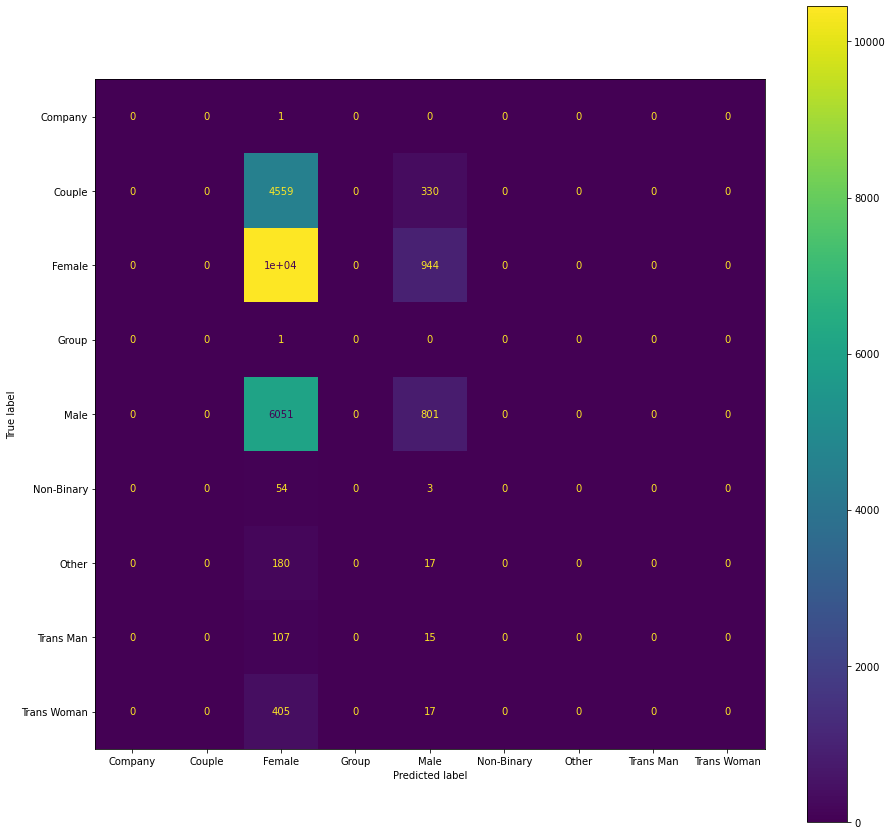

In [92]:
fig, ax = plt.subplots(figsize=(15,15))
cm = ConfusionMatrixDisplay.from_estimator(logreg, x_test, y_test, ax=ax, display_labels=target_names)
cm

'Female' и 'Male' это бо́льшая часть нашего датасета, вследствие чего неудивительно, что логистическая регрессия "нашла" в них локальные экстремумы, к которым "скатывалась" при предсказании. Результат плохой, что и следовало ожидать при таком распределении среди полов.

In [93]:
C = np.arange(0.1, 3.0, 0.1)
logreg_grid = GridSearchCV(LogisticRegression(), {'C':C})

In [94]:
logreg_grid.fit(x_train, y_train)

GridSearchCV(estimator=LogisticRegression(),
             param_grid={'C': array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. , 1.1, 1.2, 1.3,
       1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2. , 2.1, 2.2, 2.3, 2.4, 2.5, 2.6,
       2.7, 2.8, 2.9])})

In [95]:
predicted = logreg_grid.predict(x_test)

In [96]:
cv_res = logreg_grid.cv_results_['mean_test_score']

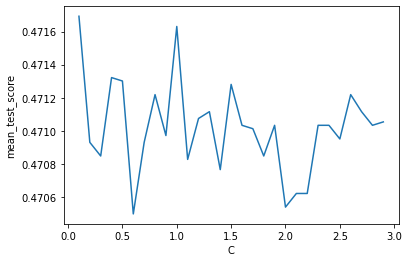

In [97]:
plot_acc(C, cv_res, 'C')

In [98]:
print(classification_report(y_test, predicted, target_names=target_names))


              precision    recall  f1-score   support

     Company       0.00      0.00      0.00         1
      Couple       0.00      0.00      0.00      4889
      Female       0.48      0.92      0.63     11393
       Group       0.00      0.00      0.00         1
        Male       0.38      0.11      0.17      6852
  Non-Binary       0.00      0.00      0.00        57
       Other       0.00      0.00      0.00       197
   Trans Man       0.00      0.00      0.00       122
 Trans Woman       0.00      0.00      0.00       422

    accuracy                           0.47     23934
   macro avg       0.10      0.11      0.09     23934
weighted avg       0.34      0.47      0.35     23934



### CatBoost (Бустим кота)

In [99]:
from catboost import CatBoostClassifier

In [100]:
catboost = CatBoostClassifier(iterations=3, depth=5, learning_rate=0.595)

In [101]:
catboost.fit(x_train, y_train)

0:	learn: 1.0142570	total: 92ms	remaining: 184ms
1:	learn: 0.9052453	total: 105ms	remaining: 52.5ms
2:	learn: 0.8533963	total: 118ms	remaining: 0us


In [102]:
predicted = catboost.predict(x_test)

In [103]:
print(classification_report(y_test, predicted, target_names=target_names))

              precision    recall  f1-score   support

     Company       0.00      0.00      0.00         1
      Couple       0.49      0.35      0.41      4889
      Female       0.68      0.86      0.76     11393
       Group       0.00      0.00      0.00         1
        Male       0.79      0.69      0.73      6852
  Non-Binary       0.00      0.00      0.00        57
       Other       0.00      0.00      0.00       197
   Trans Man       0.00      0.00      0.00       122
 Trans Woman       0.00      0.00      0.00       422

    accuracy                           0.68     23934
   macro avg       0.22      0.21      0.21     23934
weighted avg       0.65      0.68      0.66     23934



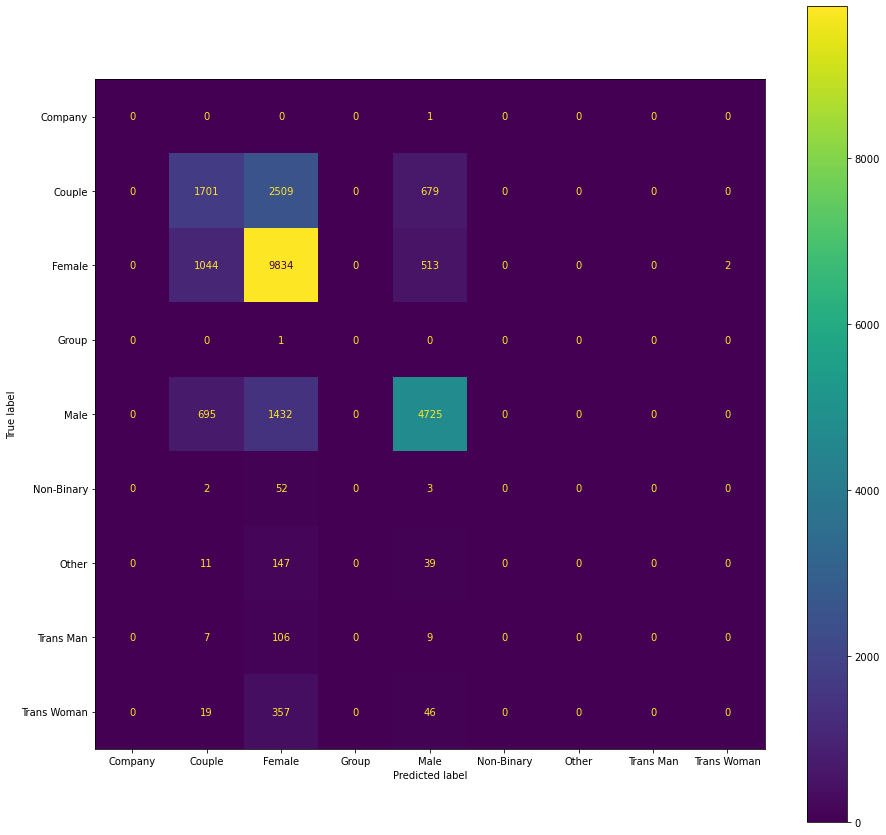

In [104]:
fig, ax = plt.subplots(figsize=(15,15))
cm = ConfusionMatrixDisplay.from_estimator(catboost, x_test, y_test, ax=ax, display_labels=target_names)
cm

Алгоритм CatBoost, также как и Рандомный лес, строит деревья решений, но другим способом. Если кратко, то в то время как Рандомный лес строит все деревья сразу, CatBoost делает это последовательно. Что и следовало ожидать, точность приблизительно равна тем результатам, что мы получили при использовании Деревьев решений и Рандомного леса.

In [105]:
iterations = np.arange(2, 15)
depth = np.arange(3, 10)
catboost_grid = GridSearchCV(CatBoostClassifier(), {'iterations':iterations, 'depth':depth})

In [106]:
catboost_grid.fit(x_train, y_train)

Learning rate set to 0.5
0:	learn: 1.0351588	total: 14.7ms	remaining: 14.7ms
1:	learn: 0.9184390	total: 23.5ms	remaining: 0us
Learning rate set to 0.5
0:	learn: 1.0698933	total: 11.3ms	remaining: 11.3ms
1:	learn: 0.9333836	total: 19.7ms	remaining: 0us
Learning rate set to 0.5
0:	learn: 1.0334869	total: 10.5ms	remaining: 10.5ms
1:	learn: 0.9171320	total: 19.8ms	remaining: 0us
Learning rate set to 0.5
0:	learn: 1.0348500	total: 10.2ms	remaining: 10.2ms
1:	learn: 0.9178334	total: 19.4ms	remaining: 0us
Learning rate set to 0.5
0:	learn: 1.0343638	total: 9.24ms	remaining: 9.24ms
1:	learn: 0.9174804	total: 18.9ms	remaining: 0us
Learning rate set to 0.5
0:	learn: 1.0351588	total: 9.18ms	remaining: 18.4ms
1:	learn: 0.9184390	total: 17.8ms	remaining: 8.88ms
2:	learn: 0.8757238	total: 26.7ms	remaining: 0us
Learning rate set to 0.5
0:	learn: 1.0698933	total: 8.07ms	remaining: 16.1ms
1:	learn: 0.9333836	total: 16.3ms	remaining: 8.17ms
2:	learn: 0.8780414	total: 24.3ms	remaining: 0us
Learning rate 

7:	learn: 0.8193654	total: 67.5ms	remaining: 0us
Learning rate set to 0.5
0:	learn: 1.0348500	total: 8.47ms	remaining: 59.3ms
1:	learn: 0.9178334	total: 17.2ms	remaining: 51.5ms
2:	learn: 0.8754182	total: 26ms	remaining: 43.4ms
3:	learn: 0.8515281	total: 34.5ms	remaining: 34.5ms
4:	learn: 0.8370182	total: 43.5ms	remaining: 26.1ms
5:	learn: 0.8285597	total: 51.6ms	remaining: 17.2ms
6:	learn: 0.8217473	total: 59.8ms	remaining: 8.54ms
7:	learn: 0.8174848	total: 68ms	remaining: 0us
Learning rate set to 0.5
0:	learn: 1.0343638	total: 8.93ms	remaining: 62.5ms
1:	learn: 0.9174804	total: 17.4ms	remaining: 52.1ms
2:	learn: 0.8749657	total: 26.3ms	remaining: 43.8ms
3:	learn: 0.8515917	total: 34.6ms	remaining: 34.6ms
4:	learn: 0.8395157	total: 42.5ms	remaining: 25.5ms
5:	learn: 0.8310904	total: 50.9ms	remaining: 17ms
6:	learn: 0.8258566	total: 59.3ms	remaining: 8.47ms
7:	learn: 0.8205578	total: 67.2ms	remaining: 0us
Learning rate set to 0.5
0:	learn: 1.0351588	total: 9.71ms	remaining: 77.7ms
1:	l

Learning rate set to 0.5
0:	learn: 1.0351588	total: 11.8ms	remaining: 130ms
1:	learn: 0.9184390	total: 23.8ms	remaining: 119ms
2:	learn: 0.8757238	total: 35.2ms	remaining: 106ms
3:	learn: 0.8522129	total: 46ms	remaining: 92ms
4:	learn: 0.8388343	total: 56.8ms	remaining: 79.6ms
5:	learn: 0.8324209	total: 67ms	remaining: 67ms
6:	learn: 0.8259500	total: 78.2ms	remaining: 55.9ms
7:	learn: 0.8215529	total: 89.2ms	remaining: 44.6ms
8:	learn: 0.8172626	total: 99.2ms	remaining: 33.1ms
9:	learn: 0.8119440	total: 110ms	remaining: 22ms
10:	learn: 0.8091159	total: 117ms	remaining: 10.7ms
11:	learn: 0.8075565	total: 126ms	remaining: 0us
Learning rate set to 0.5
0:	learn: 1.0698933	total: 12.6ms	remaining: 139ms
1:	learn: 0.9333836	total: 26.2ms	remaining: 131ms
2:	learn: 0.8780414	total: 37.2ms	remaining: 112ms
3:	learn: 0.8526929	total: 47.3ms	remaining: 94.7ms
4:	learn: 0.8380429	total: 58.9ms	remaining: 82.4ms
5:	learn: 0.8309922	total: 69.3ms	remaining: 69.3ms
6:	learn: 0.8245382	total: 80.7ms	

1:	learn: 0.9178334	total: 24.8ms	remaining: 149ms
2:	learn: 0.8754182	total: 36.6ms	remaining: 134ms
3:	learn: 0.8515281	total: 47.6ms	remaining: 119ms
4:	learn: 0.8370182	total: 58.3ms	remaining: 105ms
5:	learn: 0.8285597	total: 67.8ms	remaining: 90.4ms
6:	learn: 0.8217473	total: 78.8ms	remaining: 78.8ms
7:	learn: 0.8174848	total: 88.2ms	remaining: 66.2ms
8:	learn: 0.8155363	total: 96.5ms	remaining: 53.6ms
9:	learn: 0.8126357	total: 105ms	remaining: 41.9ms
10:	learn: 0.8064844	total: 114ms	remaining: 31.1ms
11:	learn: 0.8044901	total: 122ms	remaining: 20.4ms
12:	learn: 0.8025867	total: 131ms	remaining: 10.1ms
13:	learn: 0.8008541	total: 141ms	remaining: 0us
Learning rate set to 0.5
0:	learn: 1.0343638	total: 8.94ms	remaining: 116ms
1:	learn: 0.9174804	total: 17.1ms	remaining: 103ms
2:	learn: 0.8749657	total: 26.5ms	remaining: 97.2ms
3:	learn: 0.8515917	total: 35.1ms	remaining: 87.8ms
4:	learn: 0.8395157	total: 44.7ms	remaining: 80.4ms
5:	learn: 0.8310904	total: 52.9ms	remaining: 70.5

2:	learn: 0.8681440	total: 41.4ms	remaining: 55.1ms
3:	learn: 0.8435842	total: 55.3ms	remaining: 41.5ms
4:	learn: 0.8317433	total: 68.8ms	remaining: 27.5ms
5:	learn: 0.8231706	total: 81.8ms	remaining: 13.6ms
6:	learn: 0.8176459	total: 93.5ms	remaining: 0us
Learning rate set to 0.5
0:	learn: 1.0354144	total: 11.9ms	remaining: 71.4ms
1:	learn: 0.9148050	total: 23.7ms	remaining: 59.4ms
2:	learn: 0.8732166	total: 34.5ms	remaining: 46ms
3:	learn: 0.8494502	total: 44.2ms	remaining: 33.1ms
4:	learn: 0.8372120	total: 53.3ms	remaining: 21.3ms
5:	learn: 0.8268874	total: 63.2ms	remaining: 10.5ms
6:	learn: 0.8214410	total: 73.5ms	remaining: 0us
Learning rate set to 0.5
0:	learn: 1.0361697	total: 10.6ms	remaining: 74.1ms
1:	learn: 0.9156309	total: 22.5ms	remaining: 67.5ms
2:	learn: 0.8727403	total: 34.6ms	remaining: 57.7ms
3:	learn: 0.8467944	total: 44.4ms	remaining: 44.4ms
4:	learn: 0.8343493	total: 53.8ms	remaining: 32.3ms
5:	learn: 0.8250085	total: 63.1ms	remaining: 21ms
6:	learn: 0.8193730	tota

1:	learn: 0.9075953	total: 23.2ms	remaining: 104ms
2:	learn: 0.8648692	total: 34.4ms	remaining: 91.8ms
3:	learn: 0.8413822	total: 46ms	remaining: 80.5ms
4:	learn: 0.8270354	total: 55.6ms	remaining: 66.8ms
5:	learn: 0.8182591	total: 65.4ms	remaining: 54.5ms
6:	learn: 0.8130765	total: 74.4ms	remaining: 42.5ms
7:	learn: 0.8070001	total: 83.7ms	remaining: 31.4ms
8:	learn: 0.8045803	total: 93ms	remaining: 20.7ms
9:	learn: 0.7976573	total: 102ms	remaining: 10.2ms
10:	learn: 0.7933924	total: 112ms	remaining: 0us
Learning rate set to 0.5
0:	learn: 1.0345524	total: 9.65ms	remaining: 96.5ms
1:	learn: 0.9119021	total: 19.6ms	remaining: 88.1ms
2:	learn: 0.8665710	total: 28.8ms	remaining: 76.9ms
3:	learn: 0.8436572	total: 38.2ms	remaining: 66.8ms
4:	learn: 0.8319281	total: 47.4ms	remaining: 56.9ms
5:	learn: 0.8200866	total: 57.7ms	remaining: 48.1ms
6:	learn: 0.8148330	total: 67.8ms	remaining: 38.7ms
7:	learn: 0.8108050	total: 76.5ms	remaining: 28.7ms
8:	learn: 0.8066077	total: 85.4ms	remaining: 19m

0:	learn: 1.0361697	total: 10.8ms	remaining: 140ms
1:	learn: 0.9156309	total: 21.5ms	remaining: 129ms
2:	learn: 0.8727403	total: 32.9ms	remaining: 121ms
3:	learn: 0.8467944	total: 42.6ms	remaining: 106ms
4:	learn: 0.8343493	total: 52.5ms	remaining: 94.5ms
5:	learn: 0.8250085	total: 62.2ms	remaining: 82.9ms
6:	learn: 0.8193730	total: 71.2ms	remaining: 71.2ms
7:	learn: 0.8162899	total: 81ms	remaining: 60.8ms
8:	learn: 0.8107596	total: 90.3ms	remaining: 50.2ms
9:	learn: 0.8055576	total: 99.8ms	remaining: 39.9ms
10:	learn: 0.8033962	total: 109ms	remaining: 29.6ms
11:	learn: 0.7992657	total: 118ms	remaining: 19.6ms
12:	learn: 0.7975156	total: 127ms	remaining: 9.79ms
13:	learn: 0.7958983	total: 137ms	remaining: 0us
Learning rate set to 0.5
0:	learn: 1.0305976	total: 10.4ms	remaining: 135ms
1:	learn: 0.9075953	total: 20.4ms	remaining: 122ms
2:	learn: 0.8648692	total: 29.4ms	remaining: 108ms
3:	learn: 0.8413822	total: 39.7ms	remaining: 99.3ms
4:	learn: 0.8270354	total: 49.3ms	remaining: 88.8ms

1:	learn: 0.9099199	total: 32.2ms	remaining: 64.3ms
2:	learn: 0.8624154	total: 47.2ms	remaining: 47.2ms
3:	learn: 0.8368412	total: 63.5ms	remaining: 31.8ms
4:	learn: 0.8211615	total: 75.4ms	remaining: 15.1ms
5:	learn: 0.8122829	total: 86.6ms	remaining: 0us
Learning rate set to 0.5
0:	learn: 1.0380052	total: 12.6ms	remaining: 63ms
1:	learn: 0.9104417	total: 26.1ms	remaining: 52.3ms
2:	learn: 0.8664489	total: 42.5ms	remaining: 42.5ms
3:	learn: 0.8432666	total: 56.1ms	remaining: 28ms
4:	learn: 0.8230560	total: 72.1ms	remaining: 14.4ms
5:	learn: 0.8148276	total: 87.6ms	remaining: 0us
Learning rate set to 0.5
0:	learn: 1.0373271	total: 16.4ms	remaining: 81.9ms
1:	learn: 0.9128546	total: 33.9ms	remaining: 67.8ms
2:	learn: 0.8667182	total: 51.5ms	remaining: 51.5ms
3:	learn: 0.8442195	total: 66.1ms	remaining: 33ms
4:	learn: 0.8283673	total: 83.2ms	remaining: 16.6ms
5:	learn: 0.8182211	total: 96.9ms	remaining: 0us
Learning rate set to 0.5
0:	learn: 1.0382167	total: 16ms	remaining: 95.8ms
1:	lea

1:	learn: 0.9099199	total: 23.2ms	remaining: 92.6ms
2:	learn: 0.8624154	total: 37ms	remaining: 86.4ms
3:	learn: 0.8368412	total: 49ms	remaining: 73.4ms
4:	learn: 0.8211615	total: 60.2ms	remaining: 60.2ms
5:	learn: 0.8122829	total: 70.5ms	remaining: 47ms
6:	learn: 0.8063925	total: 80.7ms	remaining: 34.6ms
7:	learn: 0.8035023	total: 92.1ms	remaining: 23ms
8:	learn: 0.7981624	total: 103ms	remaining: 11.4ms
9:	learn: 0.7953539	total: 113ms	remaining: 0us
Learning rate set to 0.5
0:	learn: 1.0380052	total: 12.3ms	remaining: 111ms
1:	learn: 0.9104417	total: 24.3ms	remaining: 97.2ms
2:	learn: 0.8664489	total: 36.1ms	remaining: 84.2ms
3:	learn: 0.8432666	total: 47.3ms	remaining: 70.9ms
4:	learn: 0.8230560	total: 59.2ms	remaining: 59.2ms
5:	learn: 0.8148276	total: 70.2ms	remaining: 46.8ms
6:	learn: 0.8076780	total: 82.9ms	remaining: 35.5ms
7:	learn: 0.8031683	total: 95.9ms	remaining: 24ms
8:	learn: 0.7992983	total: 108ms	remaining: 12ms
9:	learn: 0.7968850	total: 119ms	remaining: 0us
Learning r

8:	learn: 0.8003848	total: 104ms	remaining: 46.2ms
9:	learn: 0.7911204	total: 118ms	remaining: 35.4ms
10:	learn: 0.7866395	total: 131ms	remaining: 23.8ms
11:	learn: 0.7833960	total: 141ms	remaining: 11.8ms
12:	learn: 0.7812566	total: 152ms	remaining: 0us
Learning rate set to 0.5
0:	learn: 1.0367430	total: 12.9ms	remaining: 154ms
1:	learn: 0.9099199	total: 24.9ms	remaining: 137ms
2:	learn: 0.8624154	total: 36.6ms	remaining: 122ms
3:	learn: 0.8368412	total: 48.5ms	remaining: 109ms
4:	learn: 0.8211615	total: 58.9ms	remaining: 94.2ms
5:	learn: 0.8122829	total: 68.8ms	remaining: 80.3ms
6:	learn: 0.8063925	total: 79.8ms	remaining: 68.4ms
7:	learn: 0.8035023	total: 91.1ms	remaining: 56.9ms
8:	learn: 0.7981624	total: 101ms	remaining: 45ms
9:	learn: 0.7953539	total: 111ms	remaining: 33.4ms
10:	learn: 0.7928792	total: 123ms	remaining: 22.3ms
11:	learn: 0.7904124	total: 133ms	remaining: 11.1ms
12:	learn: 0.7877878	total: 145ms	remaining: 0us
Learning rate set to 0.5
0:	learn: 1.0380052	total: 12m

Learning rate set to 0.5
0:	learn: 1.0163127	total: 20.1ms	remaining: 60.4ms
1:	learn: 0.9110118	total: 38.7ms	remaining: 38.7ms
2:	learn: 0.8617431	total: 58.5ms	remaining: 19.5ms
3:	learn: 0.8353229	total: 78.2ms	remaining: 0us
Learning rate set to 0.5
0:	learn: 1.0181958	total: 23.2ms	remaining: 92.8ms
1:	learn: 0.9123699	total: 41ms	remaining: 61.4ms
2:	learn: 0.8627390	total: 58.9ms	remaining: 39.3ms
3:	learn: 0.8403232	total: 75.9ms	remaining: 19ms
4:	learn: 0.8250339	total: 96ms	remaining: 0us
Learning rate set to 0.5
0:	learn: 1.0307207	total: 24.5ms	remaining: 97.9ms
1:	learn: 0.9034987	total: 43.6ms	remaining: 65.5ms
2:	learn: 0.8619715	total: 62.1ms	remaining: 41.4ms
3:	learn: 0.8340630	total: 80.2ms	remaining: 20ms
4:	learn: 0.8209337	total: 98.7ms	remaining: 0us
Learning rate set to 0.5
0:	learn: 1.0161480	total: 24.6ms	remaining: 98.2ms
1:	learn: 0.9127640	total: 43.9ms	remaining: 65.8ms
2:	learn: 0.8614061	total: 63.5ms	remaining: 42.3ms
3:	learn: 0.8376010	total: 82.1ms

4:	learn: 0.8251020	total: 77.9ms	remaining: 62.3ms
5:	learn: 0.8125186	total: 92.9ms	remaining: 46.4ms
6:	learn: 0.8011134	total: 107ms	remaining: 30.6ms
7:	learn: 0.7959064	total: 122ms	remaining: 15.2ms
8:	learn: 0.7929914	total: 134ms	remaining: 0us
Learning rate set to 0.5
0:	learn: 1.0171533	total: 17.1ms	remaining: 136ms
1:	learn: 0.9120096	total: 30.3ms	remaining: 106ms
2:	learn: 0.8623306	total: 44ms	remaining: 88.1ms
3:	learn: 0.8397608	total: 58ms	remaining: 72.5ms
4:	learn: 0.8267618	total: 71ms	remaining: 56.8ms
5:	learn: 0.8158598	total: 84.9ms	remaining: 42.4ms
6:	learn: 0.8055386	total: 97.1ms	remaining: 27.7ms
7:	learn: 0.7960957	total: 110ms	remaining: 13.8ms
8:	learn: 0.7921897	total: 124ms	remaining: 0us
Learning rate set to 0.5
0:	learn: 1.0163127	total: 17.5ms	remaining: 140ms
1:	learn: 0.9110118	total: 30.4ms	remaining: 106ms
2:	learn: 0.8617431	total: 44ms	remaining: 88.1ms
3:	learn: 0.8353229	total: 57.6ms	remaining: 72ms
4:	learn: 0.8183855	total: 70.9ms	remai

4:	learn: 0.8251020	total: 83.7ms	remaining: 117ms
5:	learn: 0.8125186	total: 101ms	remaining: 101ms
6:	learn: 0.8011134	total: 120ms	remaining: 85.9ms
7:	learn: 0.7959064	total: 136ms	remaining: 68.2ms
8:	learn: 0.7929914	total: 155ms	remaining: 51.5ms
9:	learn: 0.7853296	total: 172ms	remaining: 34.5ms
10:	learn: 0.7830100	total: 189ms	remaining: 17.2ms
11:	learn: 0.7801071	total: 206ms	remaining: 0us
Learning rate set to 0.5
0:	learn: 1.0171533	total: 18.9ms	remaining: 208ms
1:	learn: 0.9120096	total: 32.4ms	remaining: 162ms
2:	learn: 0.8623306	total: 46.4ms	remaining: 139ms
3:	learn: 0.8397608	total: 62.1ms	remaining: 124ms
4:	learn: 0.8267618	total: 79.6ms	remaining: 111ms
5:	learn: 0.8158598	total: 98.1ms	remaining: 98.1ms
6:	learn: 0.8055386	total: 116ms	remaining: 82.9ms
7:	learn: 0.7960957	total: 135ms	remaining: 67.6ms
8:	learn: 0.7921897	total: 152ms	remaining: 50.6ms
9:	learn: 0.7861776	total: 172ms	remaining: 34.4ms
10:	learn: 0.7804348	total: 189ms	remaining: 17.2ms
11:	le

3:	learn: 0.8353229	total: 81.5ms	remaining: 204ms
4:	learn: 0.8183855	total: 98.8ms	remaining: 178ms
5:	learn: 0.8083551	total: 116ms	remaining: 154ms
6:	learn: 0.7990244	total: 131ms	remaining: 131ms
7:	learn: 0.7941885	total: 146ms	remaining: 110ms
8:	learn: 0.7903039	total: 161ms	remaining: 89.7ms
9:	learn: 0.7853780	total: 179ms	remaining: 71.5ms
10:	learn: 0.7804910	total: 196ms	remaining: 53.5ms
11:	learn: 0.7744392	total: 212ms	remaining: 35.3ms
12:	learn: 0.7717665	total: 227ms	remaining: 17.4ms
13:	learn: 0.7691425	total: 240ms	remaining: 0us
Learning rate set to 0.5
0:	learn: 1.0223277	total: 29.4ms	remaining: 29.4ms
1:	learn: 0.9127002	total: 53.1ms	remaining: 0us
Learning rate set to 0.5
0:	learn: 1.0108753	total: 22.2ms	remaining: 22.2ms
1:	learn: 0.9133814	total: 43.3ms	remaining: 0us
Learning rate set to 0.5
0:	learn: 1.0202107	total: 21.2ms	remaining: 21.2ms
1:	learn: 0.9112428	total: 43ms	remaining: 0us
Learning rate set to 0.5
0:	learn: 1.0212737	total: 21.4ms	remain

1:	learn: 0.9127002	total: 46.7ms	remaining: 140ms
2:	learn: 0.8617856	total: 69.8ms	remaining: 116ms
3:	learn: 0.8291470	total: 93.2ms	remaining: 93.2ms
4:	learn: 0.8146897	total: 116ms	remaining: 69.9ms
5:	learn: 0.8045254	total: 141ms	remaining: 47ms
6:	learn: 0.7939958	total: 165ms	remaining: 23.6ms
7:	learn: 0.7886654	total: 189ms	remaining: 0us
Learning rate set to 0.5
0:	learn: 1.0108753	total: 21.6ms	remaining: 151ms
1:	learn: 0.9133814	total: 45.7ms	remaining: 137ms
2:	learn: 0.8585709	total: 75.3ms	remaining: 126ms
3:	learn: 0.8309378	total: 109ms	remaining: 109ms
4:	learn: 0.8141550	total: 142ms	remaining: 85.2ms
5:	learn: 0.8025060	total: 172ms	remaining: 57.4ms
6:	learn: 0.7929250	total: 200ms	remaining: 28.6ms
7:	learn: 0.7885370	total: 225ms	remaining: 0us
Learning rate set to 0.5
0:	learn: 1.0202107	total: 25.1ms	remaining: 175ms
1:	learn: 0.9112428	total: 49.4ms	remaining: 148ms
2:	learn: 0.8666129	total: 73ms	remaining: 122ms
3:	learn: 0.8377020	total: 96.5ms	remainin

1:	learn: 0.9112428	total: 61.7ms	remaining: 278ms
2:	learn: 0.8666129	total: 88.5ms	remaining: 236ms
3:	learn: 0.8377020	total: 113ms	remaining: 198ms
4:	learn: 0.8163182	total: 136ms	remaining: 163ms
5:	learn: 0.8076464	total: 161ms	remaining: 134ms
6:	learn: 0.7934466	total: 184ms	remaining: 105ms
7:	learn: 0.7867593	total: 207ms	remaining: 77.7ms
8:	learn: 0.7822041	total: 231ms	remaining: 51.3ms
9:	learn: 0.7786974	total: 255ms	remaining: 25.5ms
10:	learn: 0.7737263	total: 282ms	remaining: 0us
Learning rate set to 0.5
0:	learn: 1.0212737	total: 24.2ms	remaining: 242ms
1:	learn: 0.9103499	total: 53.4ms	remaining: 240ms
2:	learn: 0.8632471	total: 84ms	remaining: 224ms
3:	learn: 0.8386183	total: 114ms	remaining: 199ms
4:	learn: 0.8206482	total: 140ms	remaining: 169ms
5:	learn: 0.8058616	total: 165ms	remaining: 137ms
6:	learn: 0.7944890	total: 191ms	remaining: 109ms
7:	learn: 0.7885452	total: 214ms	remaining: 80.4ms
8:	learn: 0.7831364	total: 239ms	remaining: 53ms
9:	learn: 0.7789425	

6:	learn: 0.7939958	total: 160ms	remaining: 160ms
7:	learn: 0.7886654	total: 186ms	remaining: 139ms
8:	learn: 0.7814639	total: 210ms	remaining: 117ms
9:	learn: 0.7763914	total: 234ms	remaining: 93.7ms
10:	learn: 0.7667234	total: 257ms	remaining: 70ms
11:	learn: 0.7624454	total: 281ms	remaining: 46.8ms
12:	learn: 0.7600582	total: 304ms	remaining: 23.4ms
13:	learn: 0.7555863	total: 328ms	remaining: 0us
Learning rate set to 0.5
0:	learn: 1.0108753	total: 21.9ms	remaining: 285ms
1:	learn: 0.9133814	total: 42.4ms	remaining: 255ms
2:	learn: 0.8585709	total: 66.5ms	remaining: 244ms
3:	learn: 0.8309378	total: 90.3ms	remaining: 226ms
4:	learn: 0.8141550	total: 113ms	remaining: 203ms
5:	learn: 0.8025060	total: 137ms	remaining: 182ms
6:	learn: 0.7929250	total: 160ms	remaining: 160ms
7:	learn: 0.7885370	total: 185ms	remaining: 138ms
8:	learn: 0.7832682	total: 210ms	remaining: 117ms
9:	learn: 0.7768142	total: 234ms	remaining: 93.7ms
10:	learn: 0.7699271	total: 259ms	remaining: 70.6ms
11:	learn: 0.7

Learning rate set to 0.5
0:	learn: 1.0276463	total: 45.4ms	remaining: 227ms
1:	learn: 0.9121469	total: 88.4ms	remaining: 177ms
2:	learn: 0.8580533	total: 135ms	remaining: 135ms
3:	learn: 0.8299979	total: 181ms	remaining: 90.5ms
4:	learn: 0.8109432	total: 228ms	remaining: 45.7ms
5:	learn: 0.7984734	total: 277ms	remaining: 0us
Learning rate set to 0.5
0:	learn: 1.0262082	total: 44.8ms	remaining: 224ms
1:	learn: 0.9181312	total: 88.5ms	remaining: 177ms
2:	learn: 0.8771774	total: 96.9ms	remaining: 96.9ms
3:	learn: 0.8493564	total: 142ms	remaining: 70.8ms
4:	learn: 0.8299679	total: 189ms	remaining: 37.8ms
5:	learn: 0.8104991	total: 233ms	remaining: 0us
Learning rate set to 0.5
0:	learn: 1.0283101	total: 44.5ms	remaining: 267ms
1:	learn: 0.9199513	total: 88.6ms	remaining: 222ms
2:	learn: 0.8679090	total: 136ms	remaining: 182ms
3:	learn: 0.8390602	total: 195ms	remaining: 146ms
4:	learn: 0.8123462	total: 255ms	remaining: 102ms
5:	learn: 0.7998877	total: 313ms	remaining: 52.2ms
6:	learn: 0.7916

4:	learn: 0.8190798	total: 248ms	remaining: 248ms
5:	learn: 0.8034980	total: 305ms	remaining: 203ms
6:	learn: 0.7921772	total: 355ms	remaining: 152ms
7:	learn: 0.7840213	total: 416ms	remaining: 104ms
8:	learn: 0.7782910	total: 466ms	remaining: 51.7ms
9:	learn: 0.7711203	total: 516ms	remaining: 0us
Learning rate set to 0.5
0:	learn: 1.0276463	total: 45.7ms	remaining: 411ms
1:	learn: 0.9121469	total: 92.9ms	remaining: 372ms
2:	learn: 0.8580533	total: 138ms	remaining: 323ms
3:	learn: 0.8299979	total: 186ms	remaining: 279ms
4:	learn: 0.8109432	total: 234ms	remaining: 234ms
5:	learn: 0.7984734	total: 280ms	remaining: 187ms
6:	learn: 0.7895865	total: 326ms	remaining: 140ms
7:	learn: 0.7821971	total: 372ms	remaining: 93.1ms
8:	learn: 0.7761711	total: 421ms	remaining: 46.8ms
9:	learn: 0.7695608	total: 466ms	remaining: 0us
Learning rate set to 0.5
0:	learn: 1.0262082	total: 59.5ms	remaining: 536ms
1:	learn: 0.9181312	total: 120ms	remaining: 479ms
2:	learn: 0.8771774	total: 130ms	remaining: 303m

3:	learn: 0.8367735	total: 218ms	remaining: 491ms
4:	learn: 0.8183294	total: 268ms	remaining: 430ms
5:	learn: 0.8022046	total: 320ms	remaining: 374ms
6:	learn: 0.7876558	total: 376ms	remaining: 322ms
7:	learn: 0.7806906	total: 433ms	remaining: 270ms
8:	learn: 0.7700297	total: 491ms	remaining: 218ms
9:	learn: 0.7667011	total: 548ms	remaining: 164ms
10:	learn: 0.7556347	total: 601ms	remaining: 109ms
11:	learn: 0.7509389	total: 661ms	remaining: 55.1ms
12:	learn: 0.7455896	total: 719ms	remaining: 0us
Learning rate set to 0.5
0:	learn: 1.0261296	total: 56.8ms	remaining: 681ms
1:	learn: 0.9123685	total: 112ms	remaining: 618ms
2:	learn: 0.8729287	total: 125ms	remaining: 416ms
3:	learn: 0.8419830	total: 184ms	remaining: 413ms
4:	learn: 0.8190798	total: 243ms	remaining: 388ms
5:	learn: 0.8034980	total: 298ms	remaining: 348ms
6:	learn: 0.7921772	total: 355ms	remaining: 305ms
7:	learn: 0.7840213	total: 416ms	remaining: 260ms
8:	learn: 0.7782910	total: 480ms	remaining: 213ms
9:	learn: 0.7711203	to

3:	learn: 0.8341561	total: 365ms	remaining: 0us
Learning rate set to 0.5
0:	learn: 1.0334614	total: 87.4ms	remaining: 262ms
1:	learn: 0.9146183	total: 174ms	remaining: 174ms
2:	learn: 0.8615778	total: 263ms	remaining: 87.8ms
3:	learn: 0.8336972	total: 355ms	remaining: 0us
Learning rate set to 0.5
0:	learn: 1.0313717	total: 89ms	remaining: 267ms
1:	learn: 0.9155589	total: 175ms	remaining: 175ms
2:	learn: 0.8658198	total: 265ms	remaining: 88.4ms
3:	learn: 0.8273906	total: 355ms	remaining: 0us
Learning rate set to 0.5
0:	learn: 1.0331683	total: 90.5ms	remaining: 362ms
1:	learn: 0.9160370	total: 182ms	remaining: 272ms
2:	learn: 0.8671116	total: 269ms	remaining: 179ms
3:	learn: 0.8373062	total: 359ms	remaining: 89.8ms
4:	learn: 0.8199756	total: 448ms	remaining: 0us
Learning rate set to 0.5
0:	learn: 1.0241830	total: 90.9ms	remaining: 364ms
1:	learn: 0.9153278	total: 179ms	remaining: 268ms
2:	learn: 0.8634582	total: 268ms	remaining: 179ms
3:	learn: 0.8320604	total: 357ms	remaining: 89.3ms
4:

7:	learn: 0.7603631	total: 724ms	remaining: 90.5ms
8:	learn: 0.7515387	total: 811ms	remaining: 0us
Learning rate set to 0.5
0:	learn: 1.0314757	total: 87.4ms	remaining: 699ms
1:	learn: 0.9133666	total: 184ms	remaining: 645ms
2:	learn: 0.8609816	total: 275ms	remaining: 551ms
3:	learn: 0.8341561	total: 369ms	remaining: 461ms
4:	learn: 0.8102350	total: 463ms	remaining: 371ms
5:	learn: 0.7968540	total: 555ms	remaining: 278ms
6:	learn: 0.7802761	total: 647ms	remaining: 185ms
7:	learn: 0.7686373	total: 739ms	remaining: 92.4ms
8:	learn: 0.7593467	total: 829ms	remaining: 0us
Learning rate set to 0.5
0:	learn: 1.0334614	total: 88.6ms	remaining: 709ms
1:	learn: 0.9146183	total: 176ms	remaining: 618ms
2:	learn: 0.8615778	total: 269ms	remaining: 538ms
3:	learn: 0.8336972	total: 359ms	remaining: 449ms
4:	learn: 0.8106421	total: 450ms	remaining: 360ms
5:	learn: 0.7973296	total: 542ms	remaining: 271ms
6:	learn: 0.7859436	total: 631ms	remaining: 180ms
7:	learn: 0.7765449	total: 723ms	remaining: 90.4ms

Learning rate set to 0.5
0:	learn: 1.0314757	total: 95.9ms	remaining: 1.05s
1:	learn: 0.9133666	total: 185ms	remaining: 925ms
2:	learn: 0.8609816	total: 276ms	remaining: 829ms
3:	learn: 0.8341561	total: 370ms	remaining: 739ms
4:	learn: 0.8102350	total: 461ms	remaining: 645ms
5:	learn: 0.7968540	total: 558ms	remaining: 558ms
6:	learn: 0.7802761	total: 659ms	remaining: 471ms
7:	learn: 0.7686373	total: 758ms	remaining: 379ms
8:	learn: 0.7593467	total: 860ms	remaining: 287ms
9:	learn: 0.7512544	total: 959ms	remaining: 192ms
10:	learn: 0.7465683	total: 1.05s	remaining: 95.8ms
11:	learn: 0.7385412	total: 1.15s	remaining: 0us
Learning rate set to 0.5
0:	learn: 1.0334614	total: 111ms	remaining: 1.22s
1:	learn: 0.9146183	total: 202ms	remaining: 1.01s
2:	learn: 0.8615778	total: 306ms	remaining: 919ms
3:	learn: 0.8336972	total: 402ms	remaining: 803ms
4:	learn: 0.8106421	total: 500ms	remaining: 700ms
5:	learn: 0.7973296	total: 590ms	remaining: 590ms
6:	learn: 0.7859436	total: 678ms	remaining: 484m

3:	learn: 0.8273906	total: 391ms	remaining: 977ms
4:	learn: 0.8069433	total: 478ms	remaining: 860ms
5:	learn: 0.7916698	total: 572ms	remaining: 763ms
6:	learn: 0.7796222	total: 671ms	remaining: 671ms
7:	learn: 0.7698429	total: 763ms	remaining: 572ms
8:	learn: 0.7620014	total: 876ms	remaining: 487ms
9:	learn: 0.7539030	total: 999ms	remaining: 400ms
10:	learn: 0.7481774	total: 1.1s	remaining: 299ms
11:	learn: 0.7399717	total: 1.2s	remaining: 200ms
12:	learn: 0.7300190	total: 1.3s	remaining: 99.7ms
13:	learn: 0.7255309	total: 1.4s	remaining: 0us
Learning rate set to 0.5
0:	learn: 1.0182642	total: 35.8ms	remaining: 466ms
1:	learn: 0.9092490	total: 72.2ms	remaining: 433ms
2:	learn: 0.8652144	total: 108ms	remaining: 397ms
3:	learn: 0.8376193	total: 146ms	remaining: 365ms
4:	learn: 0.8149960	total: 181ms	remaining: 325ms
5:	learn: 0.8031425	total: 217ms	remaining: 289ms
6:	learn: 0.7878158	total: 249ms	remaining: 249ms
7:	learn: 0.7810689	total: 275ms	remaining: 206ms
8:	learn: 0.7779748	tota

GridSearchCV(estimator=<catboost.core.CatBoostClassifier object at 0x1952b0e50>,
             param_grid={'depth': array([3, 4, 5, 6, 7, 8, 9]),
                         'iterations': array([ 2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14])})

In [107]:
predicted = catboost_grid.predict(x_test)

In [108]:
print(classification_report(y_test, predicted, target_names=target_names))


              precision    recall  f1-score   support

     Company       0.00      0.00      0.00         1
      Couple       0.52      0.44      0.47      4889
      Female       0.72      0.86      0.78     11393
       Group       0.00      0.00      0.00         1
        Male       0.79      0.71      0.75      6852
  Non-Binary       0.00      0.00      0.00        57
       Other       0.00      0.00      0.00       197
   Trans Man       0.00      0.00      0.00       122
 Trans Woman       0.00      0.00      0.00       422

    accuracy                           0.70     23934
   macro avg       0.22      0.22      0.22     23934
weighted avg       0.67      0.70      0.68     23934

